In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

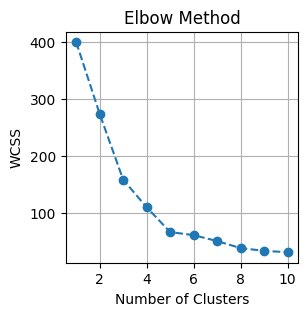

In [4]:
plt.figure(figsize=(3, 3))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

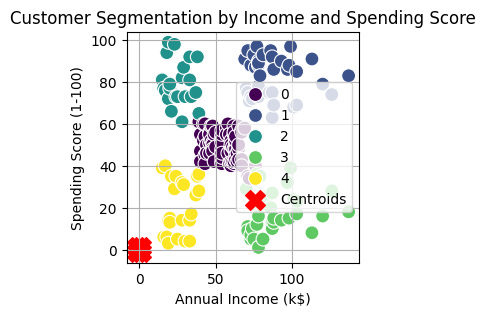

In [6]:
plt.figure(figsize=(3, 3))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segmentation by Income and Spending Score')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
joblib.dump(kmeans, 'kmeans_mall_model.pkl')
joblib.dump(scaler, 'scaler_mall.pkl')

['scaler_mall.pkl']

In [8]:
def predict_cluster(new_data):
    kmeans_loaded = joblib.load('kmeans_mall_model.pkl')
    scaler_loaded = joblib.load('scaler_mall.pkl')
    
    new_data_scaled = scaler_loaded.transform(new_data)
    cluster = kmeans_loaded.predict(new_data_scaled)
    return cluster

In [9]:
new_customer = pd.DataFrame([[40, 70]], columns=['Annual Income (k$)', 'Spending Score (1-100)'])
cluster = predict_cluster(new_customer)
print(f"Predicted Cluster: {cluster[0]}")


Predicted Cluster: 2
